Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

M = float(input("Mass of a body (kg):"))
xm = float(input("X coordinate of body:"))
ym = float(input("Y coordinate of body:"))
x = float(input("X coordinate of evaluation point:"))
y = float(input("Y coordinate of evaluation point:"))

r = np.sqrt((xm - x)**2 + (ym - y)**2)
G = 6.67 * 10**-11

def phi(r):
    return (-G * M)/(r)

potential = phi(r)

print(f"Gravitational potential at ({x}, {y}): {potential} J/kg")

Mass of a body (kg): 1
X coordinate of body: 2
Y coordinate of body: 3
X coordinate of evaluation point: 4
Y coordinate of evaluation point: 5


Gravitational potential at (4.0, 5.0): -2.358201115257136e-11 J/kg


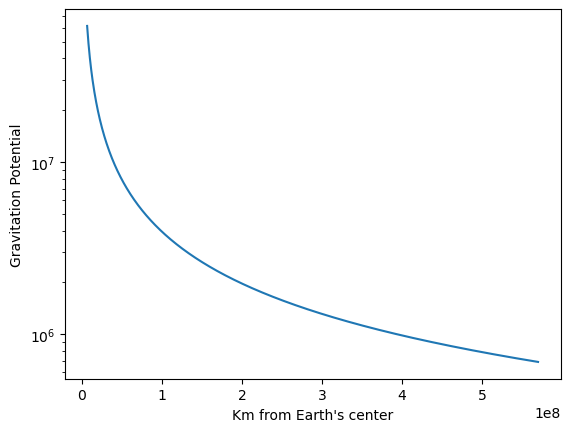

In [2]:
M_earth = 5.9 * 10**24
r_earth = 6.378 * 10**6
d_moon = 3.8 * 10**8

def plot_phi(x):
    return abs(-G * M_earth)/x

x_val = np.linspace(r_earth, 1.5 * d_moon, 1000)
y_val = plot_phi(x_val)

fig, ax = plt.subplots()
ax.plot(x_val, y_val)
ax.set_xlabel("Km from Earth's center")
ax.set_ylabel("Gravitation Potential")
ax.set_yscale("log")

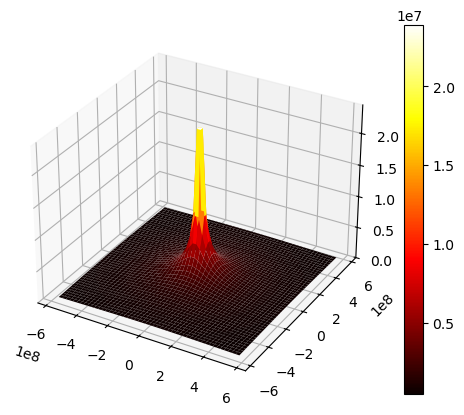

In [3]:
def colormesh_phi(x,y):
    return abs(-G * M_earth)/np.sqrt(x**2 + y**2)

x_val2 = np.linspace(-1.5 * d_moon, 1.5 * d_moon, 50)
y_val2 = np.linspace(-1.5 * d_moon, 1.5 * d_moon, 50)
X, Y = np.meshgrid(x_val2, y_val2)
z_val = colormesh_phi(X, Y)

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection = '3d')
colormesh = ax1.plot_surface(X, Y, z_val, cmap = cm.hot)
cbar = fig1.colorbar(colormesh)

Part 2

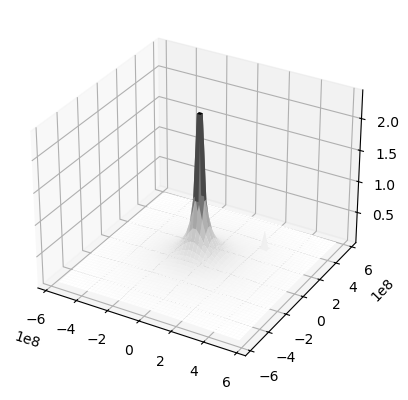

In [26]:
m_moon = 7.3 * 10**22
xearth = 0
yearth = 0
xmoon = (d_moon)/np.sqrt(2)
ymoon = (d_moon)/np.sqrt(2)

def moon_phi(x, y):
    moong = (-G * m_moon)/ np.sqrt((x - xmoon)**2 + (y - ymoon)**2)
    earthg = (-G * M_earth)/ np.sqrt((x-xearth)**2 + (y - yearth)**2)
    return abs(moong + earthg)
z = moon_phi(X, Y)
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection = '3d')
colormesh = ax2.plot_surface(X, Y, z, cmap = cm.binary)


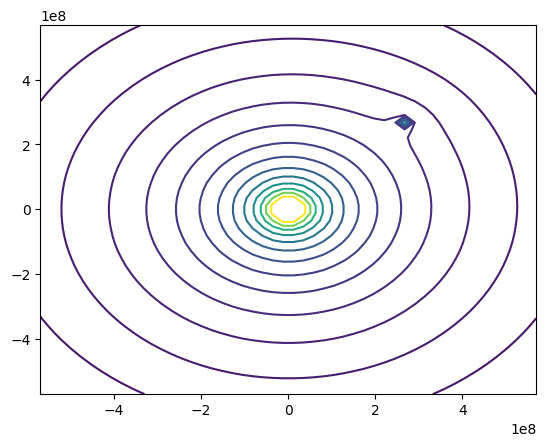

In [42]:
fig, ax = plt.subplots()
contour = ax.contour(X, Y, z, levels = np.logspace(1, 7, 60))
plt.show()

Part 3

In [7]:
m1 = float(input("Mass 1:"))
x1 = float(input("X coordinate for Mass 1:"))
y1 = float(input("Y coordinate for Mass 1:"))
m2 = float(input("Mass 2:"))
x2 = float(input("X coordinate for Mass 2:"))
y2 = float(input("Y coordinate for Mass 2:"))

rx = (x1-x2)**2
ry = (y1-y2)**2

def fx(x1,x2):
    return -G * (m1*m2)/rx

def fy(y1, y2):
    return -G * (m1*m2)/ry

print(f' The x component of gravitational potential on mass 2 {m2} from mass 1 {m1} is {fx(x1,x2)}')
print(f' The y component of gravitational potential on mass 2 {m2} from mass 1 {m1} is {fy(y1,y2)}')

Mass 1: 1
X coordinate for Mass 1: 2
Y coordinate for Mass 1: 3
Mass 2: 4
X coordinate for Mass 2: 1
Y coordinate for Mass 2: 2


 The x component of gravitational potential on mass 2 4.0 from mass 1 1.0 is -2.668e-10
 The y component of gravitational potential on mass 2 4.0 from mass 1 1.0 is -2.668e-10


Text(0, 0.5, 'Y coordinate')

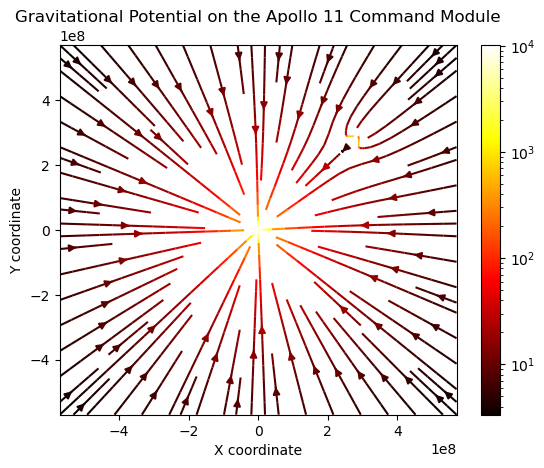

In [8]:
import matplotlib.colors as mcolors
apollo_mass = 5500
m_moon = 7.3 * 10**22
M_earth = 5.9 * 10**24

G = 6.67 * 10**-11

r_earth = 6.378 * 10**6
d_moon = 3.8 * 10**8

xearth = 0
yearth = 0
xmoon = (d_moon)/np.sqrt(2)
ymoon = (d_moon)/np.sqrt(2)

def grav_force(x,y):
    rx_e, ry_e = x - xearth, y - yearth
    rx_m, ry_m = x - xmoon, y - ymoon
    
    r_e = np.sqrt(rx_e**2 + ry_e**2)
    r_m = np.sqrt(rx_m**2 + ry_m**2)
    
    F_e = (G * M_earth * apollo_mass)/r_e**2
    F_m = (G * m_moon * apollo_mass)/r_m**2
    
    Fx_e, Fy_e = -F_e * (rx_e / r_e), -F_e * (ry_e / r_e)
    Fx_m, Fy_m = -F_m * (rx_m / r_m), -F_m * (ry_m / r_m)

    Fx = Fx_e + Fx_m
    Fy = Fy_e + Fy_m
    return Fx, Fy

x_val2 = np.linspace(-1.5 * d_moon, 1.5 * d_moon, 50)
y_val2 = np.linspace(-1.5 * d_moon, 1.5 * d_moon, 50)
X, Y = np.meshgrid(x_val2, y_val2)

Fx, Fy = np.vectorize(grav_force)(X, Y)
Fmag = np.sqrt(Fx**2 + Fy**2)

norm = mcolors.LogNorm(vmin=Fmag.min()+1e-10, vmax=Fmag.max())  

fig, ax = plt.subplots()

strm = ax.streamplot(X, Y, Fx, Fy, color = Fmag, cmap = cm.hot, norm = norm)
cbar = fig.colorbar(strm.lines, ax = ax)
ax.set_title("Gravitational Potential on the Apollo 11 Command Module")
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")

Part 4

In [43]:
from scipy.integrate import quad
ve = 2.3 * 10**3
m_dot = 1.3 * 10**4
m0 = 2.8 * 10**6
mf = 7.5 * 10**5
g = 9.81

T = (m0 - mf)/ m_dot

print(f'Total burn time: {T} seconds')

Total burn time: 157.69230769230768 seconds


In [17]:
t = float(input("Enter time (s)"))
def delta_v(t, m0, m_dot, ve, g):
    m_t = m0 - m_dot * t
    if m_t < mf:
        return 0
    return ve * np.log(m0 / m_t) - g * t

print(delta_v(t, m0, m_dot, ve, g))

Enter time (s) 45


97.59413147333635


In [21]:
h, err = quad(delta_v, 0, T)
print(h, "meters")

65924.5656507771 meters
